In [99]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import cartopy.crs as ccrs
import matplotlib.patches as mpatches

# Data Exploration

In [77]:
airports = pd.read_csv("data/airports.dat", delimiter=',', 
                       names=['id', 'name', 'city', 'country', 'iata',
                              'icao', 'lat', 'long', 'altitude', 'timezone',
                              'dst', 'tz', 'type', 'source'])
airports.head()

id                                         name          city  \
0   1                               Goroka Airport        Goroka   
1   2                               Madang Airport        Madang   
2   3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3   4                               Nadzab Airport        Nadzab   
4   5  Port Moresby Jacksons International Airport  Port Moresby   

            country iata  icao       lat        long  altitude timezone dst  \
0  Papua New Guinea  GKA  AYGA -6.081690  145.391998      5282       10   U   
1  Papua New Guinea  MAG  AYMD -5.207080  145.789001        20       10   U   
2  Papua New Guinea  HGU  AYMH -5.826790  144.296005      5388       10   U   
3  Papua New Guinea  LAE  AYNZ -6.569803  146.725977       239       10   U   
4  Papua New Guinea  POM  AYPY -9.443380  147.220001       146       10   U   

                     tz     type       source  
0  Pacific/Port_Moresby  airport  OurAirports  
1  Pacific/Port_Moresby  airport  OurAirports  
2  Pacific/Port_Moresby  airport  OurAirports  
3  Pacific/Port_Moresby  airport  OurAirports  
4  Pacific/Port_Moresby  airport  OurAirports

In [78]:
airports.describe()

id          lat         long      altitude
count   7698.000000  7698.000000  7698.000000   7698.000000
mean    5170.950117    25.808442    -1.390546   1015.873344
std     3777.259930    28.404946    86.519162   1628.775132
min        1.000000   -90.000000  -179.876999  -1266.000000
25%     1993.250000     6.907983   -78.974699     63.000000
50%     4068.000000    34.085701     6.375653    352.000000
75%     7728.750000    47.239551    56.000599   1203.000000
max    14110.000000    89.500000   179.951004  14472.000000

In [79]:
# Assign continent (region group) to airports
# --------------------------
# Rough manual mapping by country region
region_map = {
    'North America': ['United States','Canada','Mexico'],
    'South America': ['Brazil','Argentina','Chile','Colombia','Peru'],
    'Europe': ['United Kingdom','France','Germany','Italy','Spain','Netherlands'],
    'Africa': ['South Africa','Nigeria','Egypt','Kenya','Ethiopia'],
    'Asia': ['China','Japan','India','Thailand','Singapore','United Arab Emirates'],
    'Oceania': ['Australia','New Zealand']
}

def get_region(country):
    for r, c_list in region_map.items():
        if country in c_list:
            return r
    return 'Other'

airports['region'] = airports['country'].apply(get_region)


<function matplotlib.pyplot.show(close=None, block=None)>

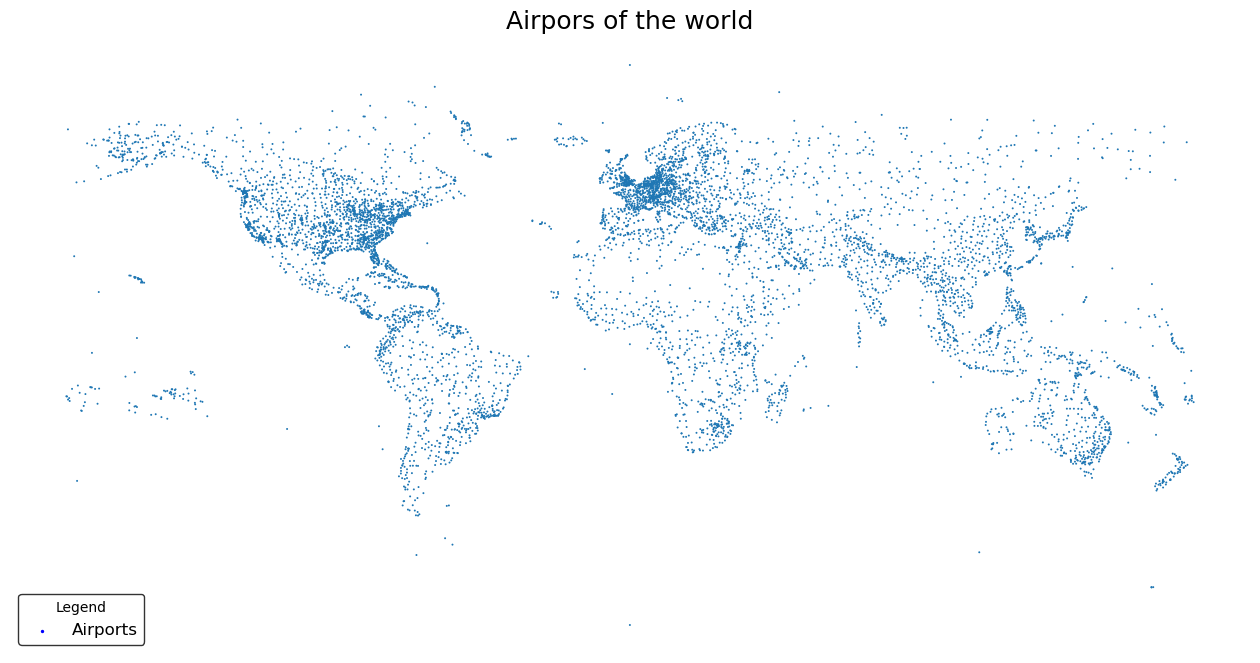

In [112]:
fig, ax = plt.subplots(figsize = (16,8))

ax.scatter(airports['long'], airports['lat'], s=2, alpha=1, edgecolors='none')

# Add legend: create a dummy point
ax.scatter([], [], s=2, color='blue', label='Airports')  # invisible point for legend
ax.legend(loc='lower left', fontsize=12, facecolor='white', edgecolor='black', title='Legend')

ax.axis('off')
ax.set_title("Airpors of the world", fontsize = 18)

plt.savefig("Airports of the world.png", dpi=300, bbox_inches='tight')
plt.show

In [81]:
routes = pd.read_csv("data/routes.dat", delimiter=',', names=['airline', 'id', 'source_airport', 'source_airport_id',
                                                               'destination_airport', 'destination_airport_id', 'codeshare',
                                                               'stops', 'equitment'])
routes.head()

airline   id source_airport source_airport_id destination_airport  \
0      2B  410            AER              2965                 KZN   
1      2B  410            ASF              2966                 KZN   
2      2B  410            ASF              2966                 MRV   
3      2B  410            CEK              2968                 KZN   
4      2B  410            CEK              2968                 OVB   

  destination_airport_id codeshare  stops equitment  
0                   2990       NaN      0       CR2  
1                   2990       NaN      0       CR2  
2                   2962       NaN      0       CR2  
3                   2990       NaN      0       CR2  
4                   4078       NaN      0       CR2

# Data Manipulation

In [96]:
# Count routes per airport
src_counts = routes['source_airport'].value_counts()
dst_counts = routes['destination_airport'].value_counts()
total_counts = src_counts.add(dst_counts, fill_value=0)

airports['route_count'] = airports['iata'].map(total_counts).fillna(0)

# Build GeoDataFrame for airports
airports_gdf = gpd.GeoDataFrame(
    airports, geometry=gpd.points_from_xy(airports['long'], airports['lat']),
    crs='EPSG:4326'
)
airports_gdf.head()

id                                         name          city  \
0   1                               Goroka Airport        Goroka   
1   2                               Madang Airport        Madang   
2   3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3   4                               Nadzab Airport        Nadzab   
4   5  Port Moresby Jacksons International Airport  Port Moresby   

            country iata  icao       lat        long  altitude timezone dst  \
0  Papua New Guinea  GKA  AYGA -6.081690  145.391998      5282       10   U   
1  Papua New Guinea  MAG  AYMD -5.207080  145.789001        20       10   U   
2  Papua New Guinea  HGU  AYMH -5.826790  144.296005      5388       10   U   
3  Papua New Guinea  LAE  AYNZ -6.569803  146.725977       239       10   U   
4  Papua New Guinea  POM  AYPY -9.443380  147.220001       146       10   U   

                     tz     type       source region  route_count  \
0  Pacific/Port_Moresby  airport  OurAirports  Other         10.0   
1  Pacific/Port_Moresby  airport  OurAirports  Other         16.0   
2  Pacific/Port_Moresby  airport  OurAirports  Other         22.0   
3  Pacific/Port_Moresby  airport  OurAirports  Other         22.0   
4  Pacific/Port_Moresby  airport  OurAirports  Other         97.0   

                     geometry  
0    POINT (145.392 -6.08169)  
1    POINT (145.789 -5.20708)  
2  POINT (144.29601 -5.82679)  
3   POINT (146.72598 -6.5698)  
4     POINT (147.22 -9.44338)

In [82]:
source_airports = airports[['name', 'iata', 'icao', 'lat', 'long', 'region']]
destination_airports = source_airports.copy()
source_airports.columns = [str(col) + '_source' for col in source_airports.columns]
destination_airports.columns = [str(col) + '_destination' for col in destination_airports.columns]

In [83]:
routes = routes[['source_airport', 'destination_airport']]
routes = pd.merge(routes, source_airports, left_on='source_airport', right_on='iata_source')
routes = pd.merge(routes, destination_airports, left_on='destination_airport', 
                  right_on='iata_destination')

#print(routes.columns)
routes.head()

source_airport destination_airport                    name_source  \
0            AER                 KZN    Sochi International Airport   
1            ASF                 KZN              Astrakhan Airport   
2            ASF                 MRV              Astrakhan Airport   
3            CEK                 KZN  Chelyabinsk Balandino Airport   
4            CEK                 OVB  Chelyabinsk Balandino Airport   

  iata_source icao_source  lat_source  long_source region_source  \
0         AER        URSS   43.449902    39.956600         Other   
1         ASF        URWA   46.283298    48.006302         Other   
2         ASF        URWA   46.283298    48.006302         Other   
3         CEK        USCC   55.305801    61.503300         Other   
4         CEK        USCC   55.305801    61.503300         Other   

              name_destination iata_destination icao_destination  \
0  Kazan International Airport              KZN             UWKD   
1  Kazan International Airport              KZN             UWKD   
2     Mineralnyye Vody Airport              MRV             URMM   
3  Kazan International Airport              KZN             UWKD   
4           Tolmachevo Airport              OVB             UNNT   

   lat_destination  long_destination region_destination  
0        55.606201         49.278702              Other  
1        55.606201         49.278702              Other  
2        44.225101         43.081902              Other  
3        55.606201         49.278702              Other  
4        55.012600         82.650703              Other

In [84]:
# Create route geometries
geometry = [LineString([[routes.iloc[i]['long_source'], routes.iloc[i]['lat_source']], 
                        [routes.iloc[i]['long_destination'], 
                         routes.iloc[i]['lat_destination']]]) for i in range(routes.shape[0])]
routes = gpd.GeoDataFrame(routes, geometry=geometry, crs='EPSG:4326')
print(routes)

      source_airport destination_airport                       name_source  \
0                AER                 KZN       Sochi International Airport   
1                ASF                 KZN                 Astrakhan Airport   
2                ASF                 MRV                 Astrakhan Airport   
3                CEK                 KZN     Chelyabinsk Balandino Airport   
4                CEK                 OVB     Chelyabinsk Balandino Airport   
...              ...                 ...                               ...   
66929            WYA                 ADL                   Whyalla Airport   
66930            DME                 FRU  Domodedovo International Airport   
66931            FRU                 DME       Manas International Airport   
66932            FRU                 OSS       Manas International Airport   
66933            OSS                 FRU                       Osh Airport   

      iata_source icao_source  lat_source  long_source region_s

In [44]:
routes.head()

source_airport destination_airport                    name_source  \
0            AER                 KZN    Sochi International Airport   
1            ASF                 KZN              Astrakhan Airport   
2            ASF                 MRV              Astrakhan Airport   
3            CEK                 KZN  Chelyabinsk Balandino Airport   
4            CEK                 OVB  Chelyabinsk Balandino Airport   

  iata_source icao_source  lat_source  long_source  \
0         AER        URSS   43.449902    39.956600   
1         ASF        URWA   46.283298    48.006302   
2         ASF        URWA   46.283298    48.006302   
3         CEK        USCC   55.305801    61.503300   
4         CEK        USCC   55.305801    61.503300   

              name_destination iata_destination icao_destination  \
0  Kazan International Airport              KZN             UWKD   
1  Kazan International Airport              KZN             UWKD   
2     Mineralnyye Vody Airport              MRV             URMM   
3  Kazan International Airport              KZN             UWKD   
4           Tolmachevo Airport              OVB             UNNT   

   lat_destination  long_destination  \
0        55.606201         49.278702   
1        55.606201         49.278702   
2        44.225101         43.081902   
3        55.606201         49.278702   
4        55.012600         82.650703   

                                        geometry  
0  LINESTRING (39.9566 43.4499, 49.2787 55.6062)  
1  LINESTRING (48.0063 46.2833, 49.2787 55.6062)  
2  LINESTRING (48.0063 46.2833, 43.0819 44.2251)  
3  LINESTRING (61.5033 55.3058, 49.2787 55.6062)  
4  LINESTRING (61.5033 55.3058, 82.6507 55.0126)

In [92]:
region_colors = {
    'North America': '#00e5ff',  # cyan
    'South America': '#00bfff',  # deep sky blue
    'Europe': '#ff66cc',         # pink
    'Africa': '#ffff33',         # bright yellow
    'Asia': '#ff6600',            # orange
    'Oceania': '#ff0033',         # bright red
    'Other': '#bbbbbb'            # light ash
}

# Data Visualisation

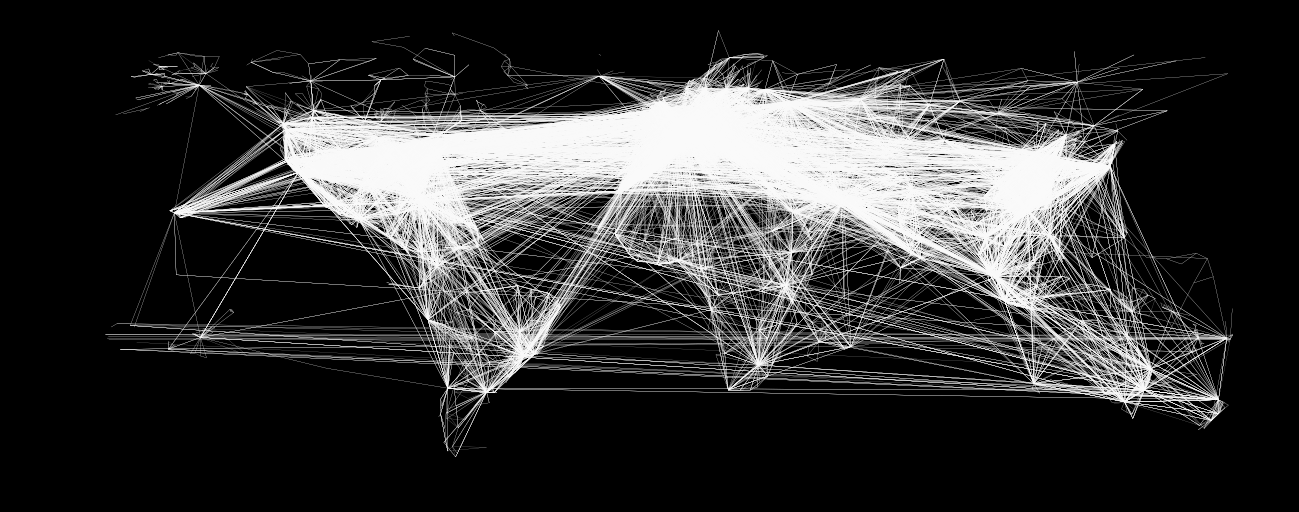

In [109]:
fig, ax = plt.subplots ( figsize = (16, 8), facecolor = "black")
ax.patch.set_facecolor('black')
routes.plot(ax=ax, color='white', linewidth=0.1)

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')

# Save figure
plt.savefig("Global_Airport_Routes_flat.png", dpi=300, bbox_inches='tight', facecolor='black')

plt.show()

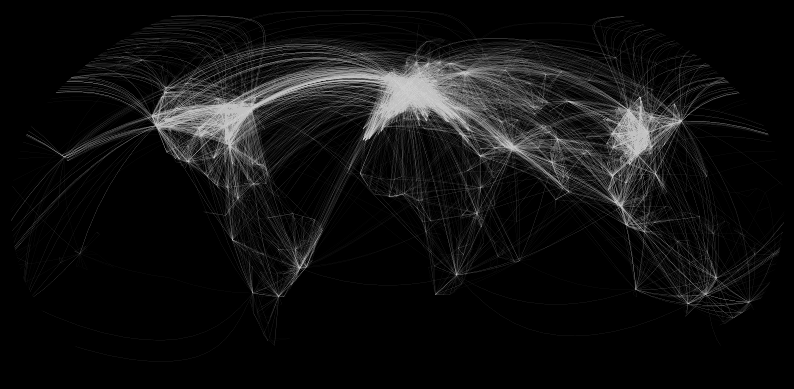

In [108]:
# Map and figure setup
fig, ax = plt.subplots(figsize=(10, 5), facecolor='black', 
                       subplot_kw={'projection': ccrs.Robinson()})

# Set black background
ax.set_facecolor('black')

# Plot routes
routes.plot(
    ax=ax,
    transform=ccrs.Geodetic(),
    color='white',
    linewidth=0.1,
    alpha=0.1
)

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')

# Save figure
plt.savefig("Global_Airport_Routes_nocolor.png", dpi=300, bbox_inches='tight', facecolor='black')

plt.show()

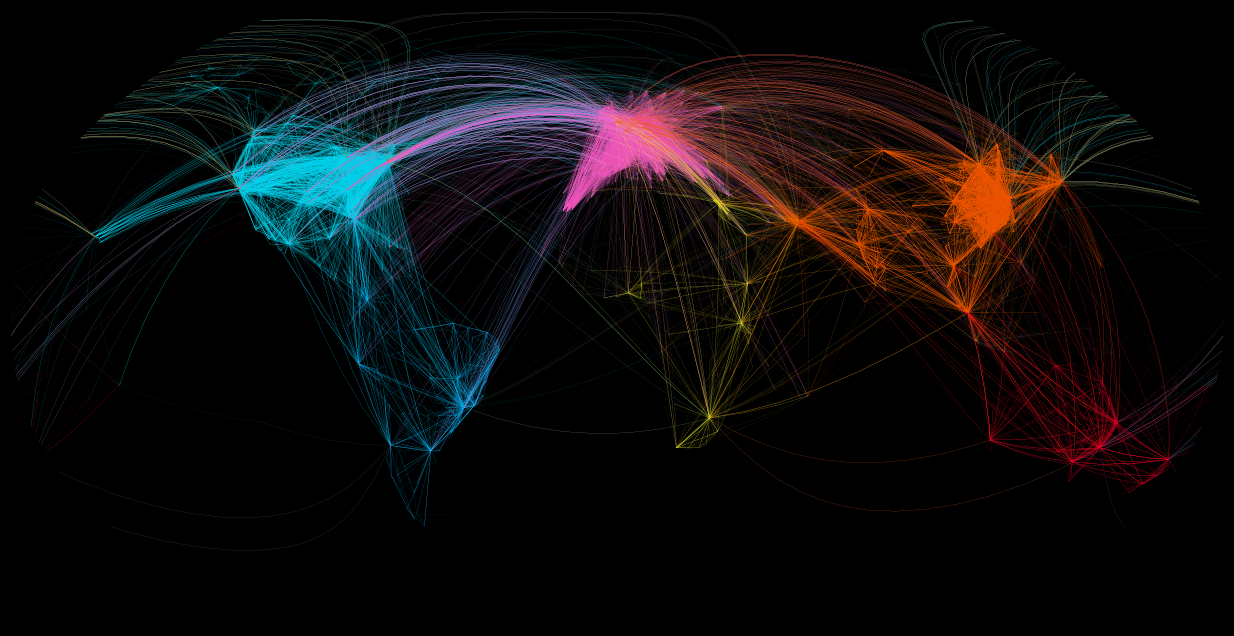

In [107]:
fig, ax = plt.subplots(figsize=(16, 8),
                       subplot_kw={'projection': ccrs.Robinson()},
                       facecolor='black')
ax.set_facecolor('black')

# Plot 'Other' first (ash + low alpha)
subset = routes[routes['region_source'] == 'Other']
subset.plot(ax=ax, transform=ccrs.Geodetic(),
            color=region_colors['Other'], linewidth=0.1, alpha=0.05)

# Plot routes colored by source region
for region, color in region_colors.items():
    if region == 'Other':
        continue
    subset = routes[routes['region_source'] == region]
    subset.plot(ax=ax, transform=ccrs.Geodetic(),
                color=color, linewidth=0.1, alpha=0.3)

ax.set_global()
ax.axis('off')

# Save figure
plt.savefig("Global_Airport_Routes.png", dpi=300, bbox_inches='tight', facecolor='black')

plt.show()

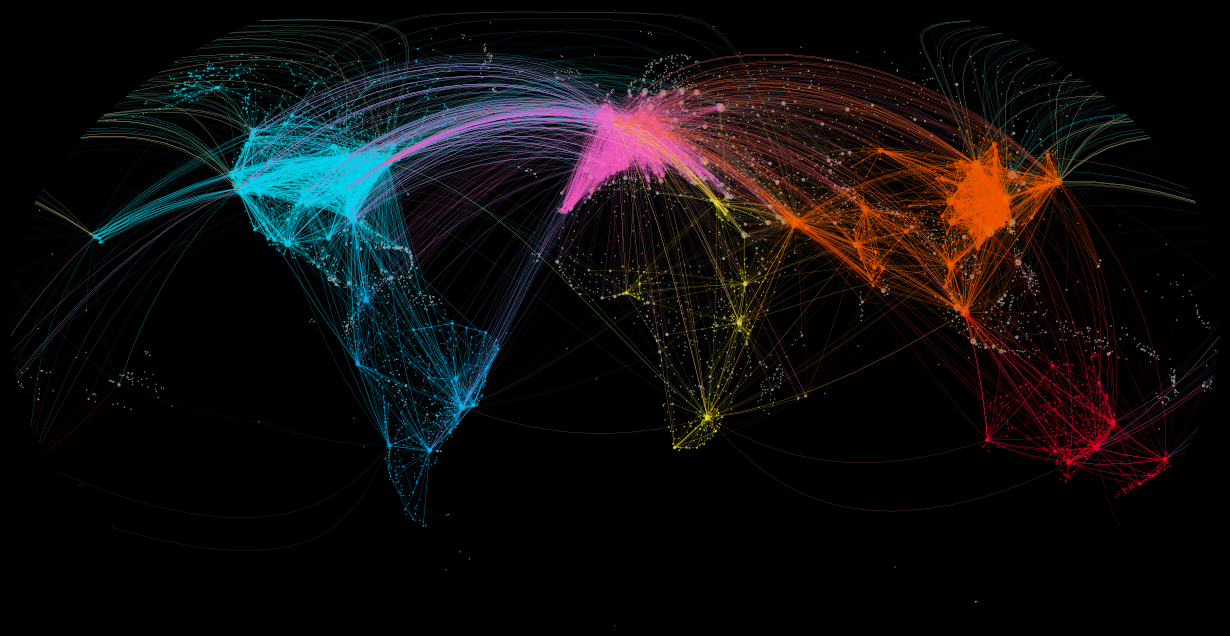

In [103]:
fig, ax = plt.subplots(figsize=(16, 8),
                       subplot_kw={'projection': ccrs.Robinson()},
                       facecolor='black')
ax.set_facecolor('black')

# Plot 'Other' routes first (ash faint)
other = routes[routes['region_source'] == 'Other']
other.plot(ax=ax, transform=ccrs.Geodetic(),
           color=region_colors['Other'], linewidth=0.1, alpha=0.05)

# Plot colored routes on top
for region, color in region_colors.items():
    if region == 'Other':
        continue
    subset = routes[routes['region_source'] == region]
    subset.plot(ax=ax, transform=ccrs.Geodetic(),
                color=color, linewidth=0.1, alpha=0.3)

# Plot airports as dots (size by route_count, color by region)
for region, color in region_colors.items():
    a = airports_gdf[airports_gdf['region'] == region]
    a.plot(ax=ax, transform=ccrs.PlateCarree(),
           markersize=a['route_count']*0.05 + 1,  # scaling factor
           color=color, alpha=0.7, edgecolor='none')

ax.set_global()
ax.axis('off')

# Save figure
plt.savefig("Global_Airport_Routes_dots.png", dpi=300, bbox_inches='tight', facecolor='black')

plt.show()

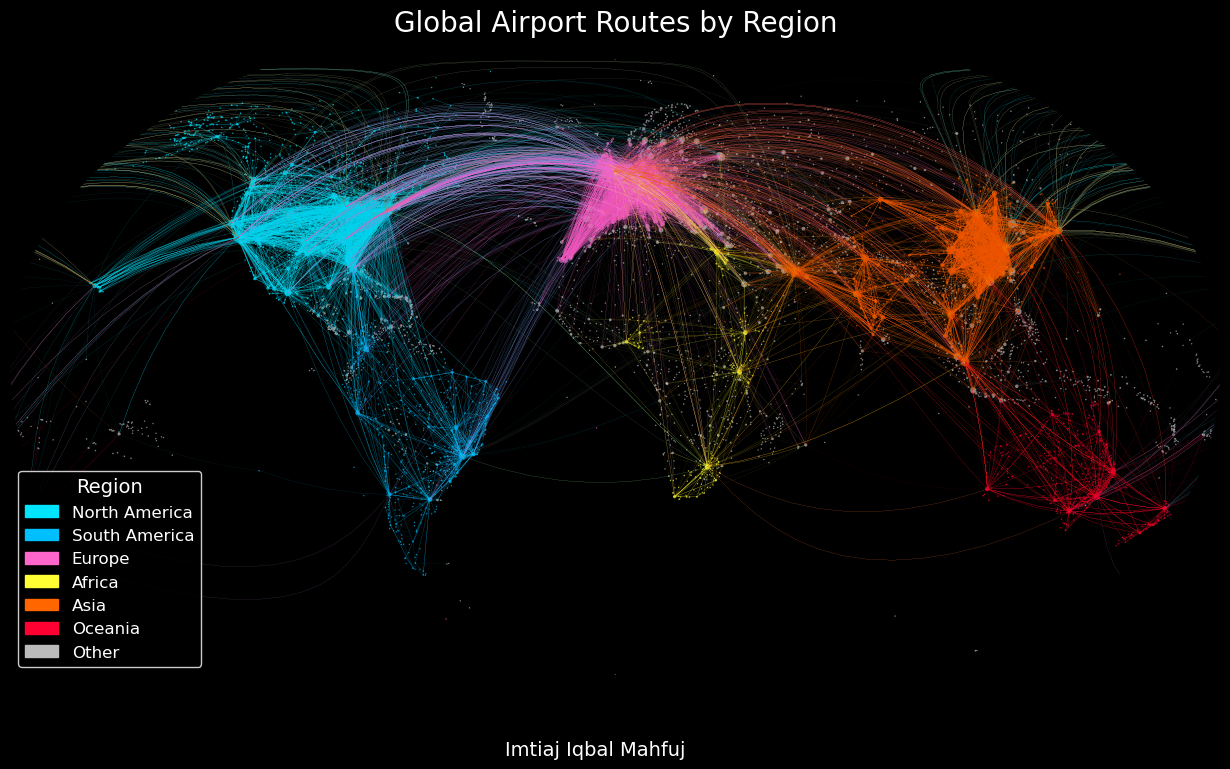

In [106]:
fig, ax = plt.subplots(figsize=(16, 8),
                       subplot_kw={'projection': ccrs.Robinson()},
                       facecolor='black')
ax.set_facecolor('black')

# Plot 'Other' routes first (ash faint)
other = routes[routes['region_source'] == 'Other']
other.plot(ax=ax, transform=ccrs.Geodetic(),
           color=region_colors['Other'], linewidth=0.1, alpha=0.05)

# Plot colored routes on top
for region, color in region_colors.items():
    if region == 'Other':
        continue
    subset = routes[routes['region_source'] == region]
    subset.plot(ax=ax, transform=ccrs.Geodetic(),
                color=color, linewidth=0.1, alpha=0.3)

# Plot airports as dots (size by route_count, color by region)
for region, color in region_colors.items():
    a = airports_gdf[airports_gdf['region'] == region]
    a.plot(ax=ax, transform=ccrs.PlateCarree(),
           markersize=a['route_count']*0.05 + 1,  # scaling factor
           color=color, alpha=0.7, edgecolor='none')

# Create legend handles
handles = []
for region, color in region_colors.items():
    handles.append(mpatches.Patch(color=color, label=region))

ax.set_global()
ax.axis('off')

# ----- Add legend for regions -----
handles = [mpatches.Patch(color=color, label=region) 
           for region, color in region_colors.items()]

# Create legend
legend = ax.legend(handles=handles, loc='lower left', 
                   fontsize=12, facecolor='black', framealpha=0.8, edgecolor='white',
                   title='Region', title_fontsize=14)

# Set colors directly after creation
plt.setp(legend.get_title(), color='white')  # legend title color
for text in legend.get_texts():
    text.set_color('white')  # legend labels
    
# Add title at top
ax.set_title("Global Airport Routes by Region", fontsize=20, color='white', pad=20)

# Add name at bottom
fig.text(0.5, 0.01, "Imtiaj Iqbal Mahfuj", fontsize=14, color='white', ha='center')

# Save figure
plt.savefig("Global_Airport_Routes_Final.png", dpi=300, bbox_inches='tight', facecolor='black')

plt.show()